In [1]:
import pandas as pd
import numpy as np


# check compatibility issues between seaborn and ptitprince
import seaborn as sns
import ptitprince as pt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import pingouin as pg
import statsmodels.api as sm
# import language_tool_python as ltp
import sys
sys.path.append('..')  
from src.visualization.plot import raincloud, raincloud2, RainCloud
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

#disable warnings
# outside of outdated, useless and annoying warnings
import warnings
warnings.filterwarnings('ignore')

    

In [2]:
df = pd.read_csv('../data/processed/dv2_dv3_dv2h_cleaned.csv')

# just print some descriptive info
for engine in df.engine.unique():
    print('Experiment=', end=' ')
    print(engine)
    print('-'*15)
    # print n subject
    print('N datasets =', end=' ')
    # group by engine and prolific_id, then count unique dataset_id
    dd = df[df.engine==engine].groupby(['prolific_id']).dataset_id.unique()
    n = sorted([i[0] for i in dd.values])
    print(len(n))
    print('N participants =', end=' ')
    print(df[df.engine==engine].dataset_id.nunique())

    # check if n unique dataset_id == n unique prolific_id
    if len(n) != df[df.engine==engine].dataset_id.nunique():
        print('WARNING: n unique dataset_id != n unique prolific_id')
        # show which dataset_id is doubled
        print('Doubled dataset_id=', end=' ')
        print([i for i in n if n.count(i) > 1])

    print('N trials = ', end='')
    # print n trials per subject
    print(df[df.engine==engine].prolific_id.value_counts().unique()[0])
    print()


Experiment= dv2
---------------
N datasets = 77
N participants = 77
N trials = 46

Experiment= dv3
---------------
N datasets = 76
N participants = 76
N trials = 45

Experiment= dv2_humanized
---------------
N datasets = 77
N participants = 77
N trials = 46



In [3]:
def raincloud2(x, y, df, markersize=None, order=None, hue=None):
    f, ax = plt.subplots()
    ax=RainCloud(x =x, y = y, hue = hue, data = df, palette = 'Set2', bw = .25, 
                 width_viol = .53, ax = ax, orient ='v' , alpha = .65, dodge = True, order=order, linewidth=0,
                 width_box=.34, point_size=markersize, point_border="white")
    return ax


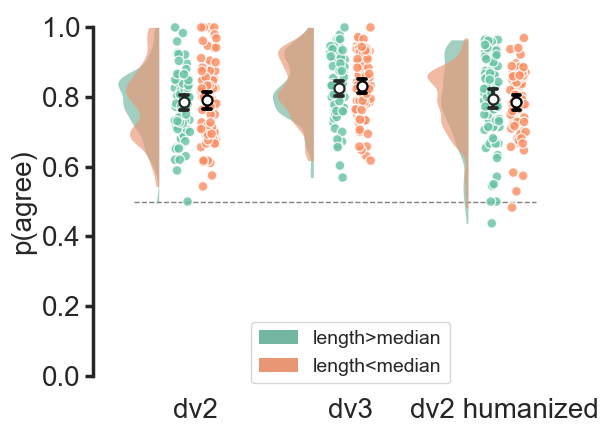

In [4]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['errors>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)
df['agree'] = np.mean([df.agree1, df.agree2], axis=0)

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'agree', 'len<median', 'errors>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'len<median'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='agree', hue="len<median",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)

plt.plot([-.4, 2.2], [0.5, 0.5], '--', color='gray', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'agree', hue ="len<median", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
    # print(f"hue: {path.get_label()}; y-values: {points[:, 1]}")
    # print(f"hue: {path.get_label()}; x-values: {points[:, 0]}")
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(agree)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
# plt.subpot(1, 3, 2)
# raincloud2(x='engine', y='p_human', hue="errors>0", data=df)
# plt.ylim(0, 1)
# plt.subplot(1, 3, 3)
# sns.barplot(x='engine', y='p_human', hue="first_person", data=df)
# plt.ylim(0, 1)
# legend only keep the first two handles
handles, labels = ax.get_legend_handles_labels()
labels = ['length>median', 'length<median']
_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14, loc='lower center')

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)
# plt.savefig('figs/fig3.svg', dpi=300, bbox_inches='tight')

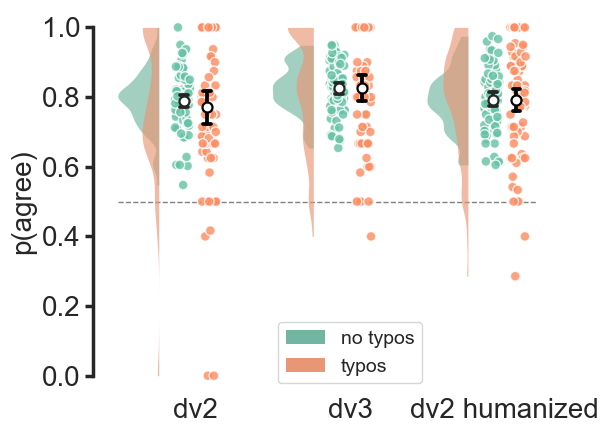

In [5]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['errors>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)
df['agree'] = np.mean([df.agree1, df.agree2], axis=0)

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'agree', 'len<median', 'errors>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'errors>0'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='agree', hue="errors>0",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)

plt.plot([-.5, 2.2], [0.5, 0.5], '--', color='grey', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'agree', hue ="errors>0", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(agree)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
# plt.subpot(1, 3, 2)
# raincloud2(x='engine', y='p_human', hue="errors>0", data=df)
# plt.ylim(0, 1)
# plt.subplot(1, 3, 3)
# sns.barplot(x='engine', y='p_human', hue="first_person", data=df)
# plt.ylim(0, 1)
# legend only keep the first two handles
handles, labels = ax.get_legend_handles_labels()
labels = ['no typos', 'typos']
_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14, loc='lower center')

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)
# plt.savefig('figs/fig3.svg', dpi=300, bbox_inches='tight')

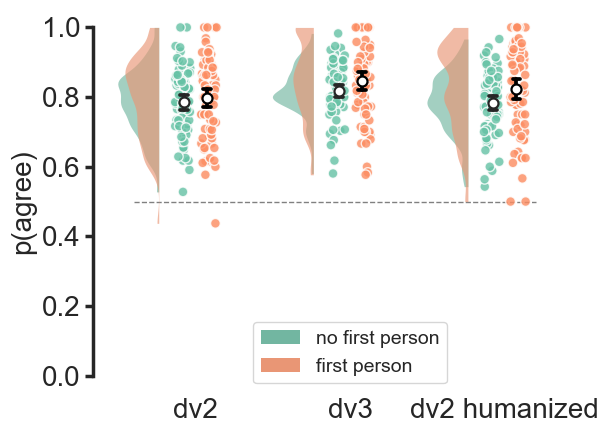

In [6]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['typos>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)

df['agree'] = np.mean([df.agree1, df.agree2], axis=0)   

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'agree', 'len<median', 'typos>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'first_person'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='agree', hue="first_person",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)
plt.plot([-.4, 2.2], [0.5, 0.5], '--', color='grey', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'agree', hue ="first_person", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
    # print(f"hue: {path.get_label()}; y-values: {points[:, 1]}")
    # print(f"hue: {path.get_label()}; x-values: {points[:, 0]}")
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(agree)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
handles, labels = ax.get_legend_handles_labels()
labels = ['no first person', 'first person']

_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14, loc='lower center')

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)

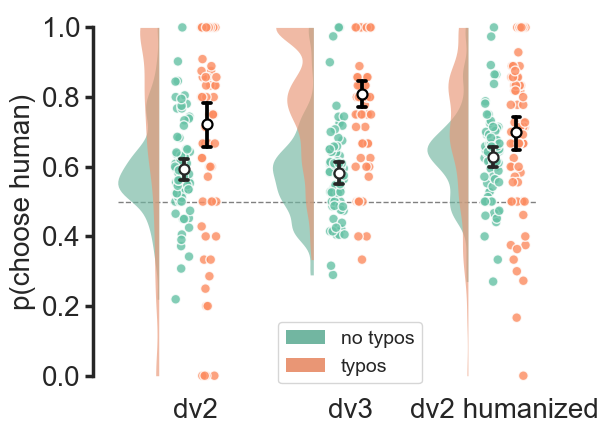

In [7]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['typos>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'p_human', 'len<median', 'typos>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'typos>0'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='p_human', hue="typos>0",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)

plt.plot([-.5, 2.2], [0.5, 0.5], '--', color='grey', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'p_human', hue ="typos>0", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
    # print(f"hue: {path.get_label()}; y-values: {points[:, 1]}")
    # print(f"hue: {path.get_label()}; x-values: {points[:, 0]}")
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(choose human)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
# plt.subpot(1, 3, 2)
# raincloud2(x='engine', y='p_human', hue="errors>0", data=df)
# plt.ylim(0, 1)
# plt.subplot(1, 3, 3)
# sns.barplot(x='engine', y='p_human', hue="first_person", data=df)
# plt.ylim(0, 1)
# legend only keep the first two handles
handles, labels = ax.get_legend_handles_labels()
labels = ['no typos', 'typos']
_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14)

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)
# plt.savefig('figs/fig4.svg', dpi=300, bbox_inches='tight')

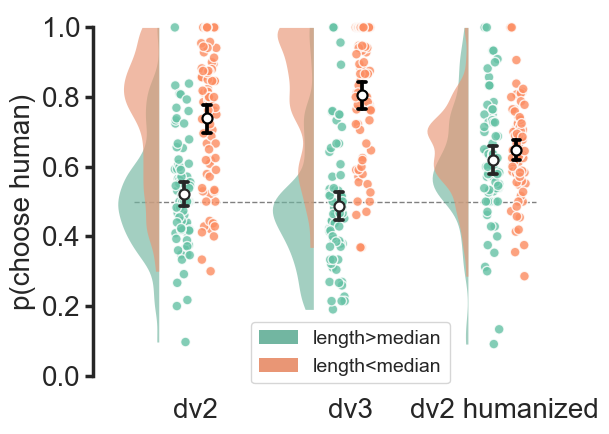

In [8]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['errors>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)
df['agree'] = np.mean([df.agree1, df.agree2], axis=0)

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'p_human', 'len<median', 'errors>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'len<median'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='p_human', hue="len<median",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)

plt.plot([-.4, 2.2], [0.5, 0.5], '--', color='gray', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
    # print(f"hue: {path.get_label()}; y-values: {points[:, 1]}")
    # print(f"hue: {path.get_label()}; x-values: {points[:, 0]}")
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(choose human)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
# plt.subpot(1, 3, 2)
# raincloud2(x='engine', y='p_human', hue="errors>0", data=df)
# plt.ylim(0, 1)
# plt.subplot(1, 3, 3)
# sns.barplot(x='engine', y='p_human', hue="first_person", data=df)
# plt.ylim(0, 1)
# legend only keep the first two handles
handles, labels = ax.get_legend_handles_labels()
labels = ['length>median', 'length<median']
_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14, loc='lower center')

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)
# plt.savefig('figs/fig3.svg', dpi=300, bbox_inches='tight')

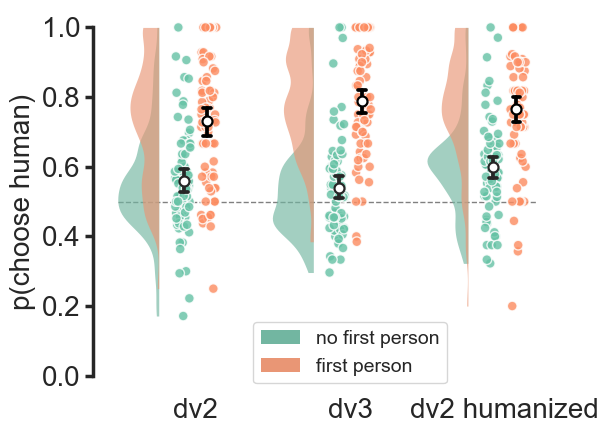

In [9]:
sns.set(
    rc={'figure.figsize':(6,4.5), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
    
sns.set_style("ticks")
# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['svg.fonttype'] = 'none'

# plt.figure(figsize=(15, 5))
df['len<median'] = (df.len < df.len.median()).astype(int)
df['typos>0'] = (df.errors > 0).astype(int)
df['first_person'] = df.first_person.astype(int)

# average over prolific_id
df2 = df.filter(['engine', 'prolific_id', 'p_human', 'len<median', 'typos>0', 'first_person'])\
.groupby(['engine', 'prolific_id', 'first_person'], as_index=False).mean()

# plt.subplot(1, 3, 1)
ax = raincloud2(x='engine', y='p_human', hue="first_person",df=df2,
                 order=('dv2', 'dv3', 'dv2_humanized'), markersize=7)
plt.plot([-.5, 2.2], [0.5, 0.5], '--', color='grey', linewidth=1, zorder=-5)
plt.ylim(-0.05, 1.05)
ax = sns.pointplot(x = 'engine', y = 'p_human', hue ="first_person", data = df2, color = 'black', linecolor='black',
                     orient = 'v', order = ('dv2', 'dv3', 'dv2_humanized'), 
                     dodge = .3/2, errorbar='se', linewidth=.8, join=False, alpha=.5, capsize=.05)

for path in ax.collections:
    points = path.get_offsets()
    # print(f"hue: {path.get_label()}; y-values: {points[:, 1]}")
    # print(f"hue: {path.get_label()}; x-values: {points[:, 0]}")
all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][::-1][:2]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][::-1][:2]

plt.scatter(all_x_values, all_y_values, marker='o', color='white', s=150/9, linewidth=1.5, zorder=100)
# sns.pointplot(x = 'engine', y = 'p_human', hue ="len<median", data = df2, color = 'white', linewidth=0,
plt.tick_params(axis='x', length=0) 
plt.ylabel('p(choose human)')
plt.xlabel('')
plt.xticks([0, 1, 2], ['dv2', 'dv3', 'dv2 humanized'])
handles, labels = ax.get_legend_handles_labels()
labels = ['no first person', 'first person']

_ = plt.legend(handles[0:2], labels[0:2], title = '', fontsize=14, loc='lower center')

plt.tight_layout()

sns.despine(trim=True, bottom=True, offset=18)